# Computational Physics
## Air Resistance

<img src="../data/bicycle.png" width=600px>

In [1]:
'''import style
style._set_css_style('../include/bootstrap.css')'''

"import style\nstyle._set_css_style('../include/bootstrap.css')"

## Last Time
### [Notebook Link: 12_RadioactiveDecay.ipynb](./12_RadioactiveDecay.ipynb)

- radioactive decay
- discrete approximation to the derivative
- numerical solutions of ordinary differential equations with Euler's Method

## Today

- bicycle motion
- drag forces


## Setting up the Notebook

In [2]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
plt.style.use('../include/notebook.mplstyle');
%config InlineBackend.figure_format = 'svg'

## Bicycle  Motion

Consider the motion of a bicycle without friction.  The starting point is Newton's second law

\begin{equation}
\frac{dv}{dt} = \frac{F}{m}
\end{equation}
where $m$ is the mass of the complete bicycle + rider system.  In principle the details of the total force are quite complicated, but we can measure the average power generated by a rider.  Elite cyclists can maintain a power output of approximately 400 W over extended periods on flat roads. Power is the rate of change of energy:

\begin{align}
P &= \frac{dE}{dt} \quad \mathrm{and}\quad E = \frac{1}{2} m v^2 \\
&= \frac{1}{2} m \frac{d}{dt} (v^2) \\
&= m v \frac{d v}{dt} . 
\end{align}

Assuming $P$ is constant, we can solve by integrating:
\begin{align}
\int_{v_0}^v v dv &= \frac{P}{m}\int_0^t dt \\
\frac{1}{2} \left. v^2\right \rvert_{v_0}^v &= \frac{P}{m} t \\
v(t) &= \sqrt{v_0^2 + 2 \frac{P}{m} t} 
\end{align}


which can be written this as:
\begin{equation}
\frac{v(t)}{v_0} = \sqrt{1 + \frac{2 P}{m v_0^2} t}.
\end{equation}

### Plotting the motion

Text(0.5, 0, '$(2P/m v_0^2) t$')

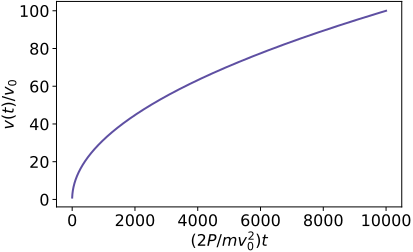

In [3]:
t = np.arange(0,10000,0.1)
plt.plot(t,np.sqrt(1+t))
plt.ylabel(r'$v(t)/v_0$')
plt.xlabel(r'$(2P/m v_0^2) t$')

Obviously we have a big problem here, the model predicts that the velocity increaes without bound.  We have neglected the important effects of air resistance

## Air Resistance

For a well tuned road bike, the energy lost to friction in the hubs and tires is negligible compared to wind resistance.  The physics of air resistance is quite complicated, but in general the **drag force** can be written as the sum of two terms:

\begin{equation}
F_{\rm drag} \approx -B_1 v - B_2 v^2 .
\end{equation}

### Viscous Drag
The first term dominates at low velocities and is generally proportional to viscosity $\eta$ and the linear size of the body.  For a sphere of radius $R$, $B_1 = 6\pi \eta R$.

### Inertial Drag
This is the term that we will be most concerned with in this course.  It is very difficult to calculate in general and usually requres the use of wind-tunnel experiments or computer simulations.  However, we can make a rought *back of the envelope* calculation.

This type of drag arises from the fact that an object moving through a dense medium has to *push* material out if its way.  Consider an object moving through the atmosphere (density $\rho$) with velocity $v$ with a cross sectional area $A$.  In a time $\Delta t$ the mass that must be moved out of the way is:

\begin{equation}
m = \rho A v \Delta t.
\end{equation}

<img src="../data/drag.svg" width=400px>

This *chunk* of atmosphere has now been given a velocity $v$  so its kinetic energy is

\begin{equation}
E = \frac{1}{2} m v^2.
\end{equation}

This must be equal to the work performed on the *air mover* due to air resistance in the time $\Delta t$ and $W = F \times d = \Delta KE$ so
\begin{equation}
F_{\rm drag} v \Delta t = -E.
\end{equation}

Putting this together:
\begin{align}
F_{\rm drag} v \Delta t &= -\frac{1}{2} \rho A v \Delta t v^2  \\
F_{\rm drag} &= -\frac{1}{2} C \rho A v^2
\end{align}
where we have introduced the *drag coefficient* $C$ which is equal to unity in our simple model.  In general it needs to be measured or computed.  The [wikipedia article](https://en.wikipedia.org/wiki/Drag_coefficient) includes values of $C$ for many objects. 

### Does this formula agree with our expectations?

<!--
1. It opposes motion (minus sign).
2. Weak at low speeds.
3. Strong at large speeds.
4. Harder to move through a liquid than a gas (dependent on $\rho$)
5. Larger objects have more drag (sail, parachute, etc.)
-->

### Updating our Bicycle Model

We can modify our equation of motion for the bicycle to include the effects of air resistance. Neglecting the unimportant linear term for larger velocities we have:

\begin{equation}
\frac{dv}{dt} = \frac{P}{m v} - \frac{1}{2m} C \rho A v^2 
\end{equation}

<div class="alert alert-warning">
<h4>This resonably simple first order ordinary differential equation has no solution in terms of known functions.</h4>
</div>
    
However, we know how to solve this on a computer using the Euler Method.  Last time we learned how to discretize the continuous derivative:

\begin{equation}
\frac{dv}{dt} = \frac{v(t+\Delta t) - v(t)}{\Delta t} + O(\Delta t) .
\end{equation}

Switching to subscript notation for indices, our equation of motion can be written as:

\begin{align}
v_{n+1} = v_n + \frac{P \Delta t} { m v_n} - \frac{1}{2m} C \rho A v_n^2 \Delta t.
\end{align}

Consider the set of physical parameters:

\begin{align}
    m &= 70~{\rm kg} \\
    A &= 0.33~\mathrm{m}^2 \\
    \rho &= 1.2~\mathrm{kg}/\mathrm{m}^3 \\
    P &= 400~\mathrm{W} \\
    C &= 0.5
\end{align}

<div class="span alert alert-success">
<h2> Team Programming challenge </h2>
For an initial velocity of $v_0 = 4~\mathrm{m/s}$ compute the updated bicycle trajectory and compare with the $C=0$ case.<br /><br/>
    
 <p>
 Get started by copy/pasting our radioactive decay code.  You won't need to change it much!
  </p>
</div>


Text(0, 0.5, 'v [m/s]')

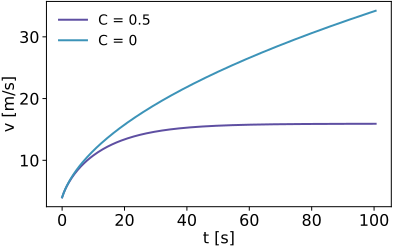

In [29]:
 # initialize all variables 
Δt = 0.25 # s
m = 70 # kg
A = 0.33 # m^2
ρ = 1.2 # kg/m^3
P = 400 # W
vₒ = 4.0 # m/s
C = 0.5

tmin,tmax,Δt = 0.0,100.0,0.5

for C in [0.5,0]:
        
    t = tmin
    v = vₒ
    vList = []
    tList = []
    vList.append(v)
    tList.append(t)
    while t <= tmax:
        v += P*Δt/m/v - 1/2/m*C*ρ*A*v**2*Δt
        t += Δt
        vList.append(v)
        tList.append(t)

    plt.plot(tList,vList, label = f'C = {C}')
plt.legend()
plt.xlabel('t [s]')
plt.ylabel('v [m/s]')




In [5]:
%run ./examples/Simple_ODEs/bicycle.py

Exception: File `'./examples/Simple_ODEs/bicycle.py'` not found.

## Using Scipy

Text(0, 0.5, 'Speed [m/s]')

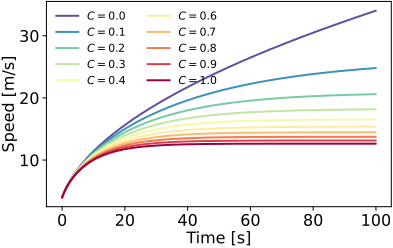

In [ ]:
from scipy.integrate import solve_ivp
t = np.arange(0,100,0.1)
vₒ = 4.0 # m/s
for C in np.linspace(0,1,10):
    sol = solve_ivp(lambda t,v: P/(m*v) - (C*ρ*A/(2*m))*v**2, [np.min(t),np.max(t)],[4],t_eval=t)
    plt.plot(sol.t,sol.y[0,:],label=f'$C={C:.1f}$')

plt.legend(loc='upper left', ncol=2, fontsize=11)
plt.xlabel('Time [s]')
plt.ylabel('Speed [m/s]')